<a href="https://colab.research.google.com/github/lukasbrchl/Czechitas-segmentace-demo/blob/master/Czechitas_segmentation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ukázka využití průmyslové kamery a osvětlení pro úlohu segmentace objektů dle barev
Cvičení si pro vás připravila Laboratoř zpracování obrazu - [ImproLab](https://fit.cvut.cz/cs/veda-a-vyzkum/zazemi/laboratore/8357-laborator-zpracovani-obrazu) na [Fakultě informačních technologií ČVUT v Praze](https://fit.cvut.cz/cs). 

Naším cílem je **vytvářet řešení reálných problémů**. Jednou z hlavních aktivit laboratoře je tedy spolupráce s praxí. 


Využití kamer v průmyslu je v současnosti důležitým způsobem **automatizace** v továrnách. Kamera je schopna nahradit člověka při **vyhodnocování kvality** vytvořených výrobků a dodat systému důležité **objektivní rozhodování** za jakékoli situace.
<center><img src="https://images.squarespace-cdn.com/content/v1/5a850b55017db20aff4b96c4/1581216076561-FQJKGMAMUGT9EOJ1QOWV/ke17ZwdGBToddI8pDm48kPg3kkMSlDqGprD-21e6kCJZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PIKLQjoMTHEldWYTXK7NhTrQG-VDSQcMX4-xxuKYa_e-c/02.png" alt="the name" width="350"/></center> 

Cvičení je zaměřené **na správné využití osvětlení** při nasvícení objektu a následné využití **metod pro segmentaci obrazu** k počítání objektů. Během našeho cvičení budeme snímat barevné objekty. Výsledný snímek by mohl vypadat nějak takto:

<center><img src="https://raw.githubusercontent.com/ImprolabFIT/Czechitas-segmentace-demo/master/images/lentilky.png" alt="the name" width="350"/></center> 

# Stručné představení nástroje Google Colab
Online aplikace Google Colab poskytuje pohodlné rozhraní pro spouštění kódu psaného v jazyce Python a zároveň psaní formátovaných textů. To vše v jednom dokumentu a ve virtuálním prostředí. 

Základím stavebním kamenem Colabu jsou notebooky a vy máte právě otevřený jeden z nich. Notebooky se skládají z jednotlivých buňek, ve kterých jde postupně spoušťet kód. Výsledky jednotlivých buňek jsou ukládaný do paměti a je tedy možné s nimi pracovat napříč celým notebookem. 

Ke spuštění kódu v Colabu je nejdříve nutné se připojit k vyhodnocvacímu kernelu (vyžaduje přihlášení Google účtem). To lze provést v pravém horním rohu notebooku tlačítkem **Connect**. Jakmile vidíme ve stejném řádku vidíme, že jsme připojeni ke kernelu (zelená fajfka), je možné jednotlivé buňky spouštět následovně: 
* **Play ikona** v levém rohu každé buňky
* **Ctrl+Enter** pro spuštění aktuální buňky 
* **Shift+Enter** pro spuštění aktuální buňky a přesunutí focusu na další buňku

V případě, že se nějaká buňka zasekne, je možné její spuštění ukončit přes nabídku v menu - **Runtime -> Interrupt execution**. Kromě toho je možné i v nabídce **Runtime** restartovat celý kernel, čímž se odstraní všechna uložená data z paměti.

*Pro zajímavost:*
- Colab notebooky nejsou ve skutečnosti nic jiného než [Jupyter Notebooky](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) v online prostředí.
- Pro psaní formátovaných textů je využit jazyk [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb).





# Teoretické základy 
Ve strojovém vidění se pracuje s několika pojmy, které jsou pro pochopení cvičení důležité. Jsou to tyto:
> Segmentace
* Je rozdělení obrazu na zajímavé **objekty** a nezajímavé **pozadí**.
* Výsledkem je binární (černobílý) obraz, často se mu říká **maska**.
<center><img src="https://images.deepai.org/converted-papers/1812.10889/figure/appendix-seg-coco-4.jpg" alt="the name" width="800"/>
</center>

> Barevný prostor
* Je rozdělení každé barvy na 3 části (složky). 
* Nejčastěji se používá prostor RGB (červená, zelená, modrá).
* Další možností je HSV (barevný odstín, sytost barvy, jas).
* HSV je **vhodnější** prostor pro segmentaci **pomocí barvy**.
<center><img src="https://docs.opencv.org/3.4/Threshold_inRange_RGB_colorspace.jpg" alt="the name" width="250"/><img src="https://docs.opencv.org/3.4/Threshold_inRange_HSV_colorspace.jpg" alt="the name" width="250"/>
</center>

> Kontury
* Jsou **obrysy** binárního obrázku (masky).
* Využívají se k porovnávání se známými objekty pomocí tzv. **tvarových charakteristik** (jakými je například **kulatost** nebo **poměr stran**).
<center><img src="https://www.azilen.com/blog/wp-content/uploads/2017/02/edge_detection.jpg" alt="the name" width="250"/>
</center>

> Filtrace
* Je **manipulace** s obrázkem s cílem **odstranění drobných vad** pomocí rozmazání obrázku.
* Výsledkem je sjednocení hodnot obrázku, který se dále jeví tzv. "bez šumu".
* Často se jedná o nástroj používaný při tzv. retouchování fotografií.
<center><img src="https://i.pinimg.com/originals/eb/71/e4/eb71e42ecfc1279d5d3c161bee47a994.jpg" alt="the name" width="400"/>
</center>

> Morfologie
* Je způsob jak **zmenšovat či zvětšovat** binární masky s cílem odstranění parazitického šumu, který může vzniknout segmentací.
* Jedná se tedy o metody pro **vylepšení obrázků** po segmentaci s cílem **lépe spočítat** počet nalezených objektů.
<center><img src="https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/54538/versions/1/screenshot.png" alt="the name" width="500"/>
</center>

## Možnostni nastavení kamery
V rámci tohoto cvičení budeme využívat průmyslové kamery řady Basler ACE. Jejich hlavní výhodou proti jakýmkoliv běžným kamerám je, že poskytují nekomprimovaný výstup a jsou schopny provozu 24/7. Dalším rozdílem je, že proti kamerám např. v mobilních telefonech je nutné průmyslové kamery vhodně nastavit. Nastavení, které ovlivňují výsledný snímek jsou dvojího druhu: **nastavení objektivu** a **nastavení kamery v obslužném software**.

### Nastavení objektivu
Na objektivu, který máte před sebou, můžete vidět dva pohyblivé prstence. Ten jeden slouží k zaostřování objektivu a ten druhý k změně průměru vnitřní clony. **Pozor, před pohybem jakéhokoliv prstence je vždy nutné povolit aretační šrouby.**

<center><img src="https://raw.githubusercontent.com/ImprolabFIT/Czechitas-segmentace-demo/master/images/objektiv.png" alt="the name" width="350"/></center> 

Pokud bychom byly ve světě běžných kamer, tak se ještě setkáme s nastavením ohniskové vzdálenosti. Ta definuje zorný úhel kamery - jinými slovy, jak moc objektiv přibližuje (optický zoom). V našem případě máme ohniskovou vzdálnost fixní a pro vhodné zachycení chtěných objektů musíme tedy měnit vzdálenost kamery od našeho cíle. To můžeme provést pohybem páky na stojanu s kamerou.
<center><img src="https://cdn-7.nikon-cdn.com/Images/Learn-Explore/Photography-Techniques/2009/Focal-Length/Media/red-barn-focal-lenght-rep-image.jpg" alt="the name" width="350"/></center> 

#### Ostření
Většina průmyslových objektivů disponuje pouze manuálním ostřením. To z toho důvodu, protože se předpokládá, že kamera bude umístěna staticky někde v průmyslu a její nastavení se po celou dobu jejího provozu už nebude měnit. Díky absenci automatického ostření je možné mít objektivy levnější a kompaktnější.

Pohyb ostřícího prstence upravuje vnitřní rozložení optických členů, což mění rovinu zaostření, které určuje, jaké objekty se na snímku zobrazí dokonale ostře. Rovina zaostření je kolmá k ose objektivu (rovnoběžná se snímačem) a kolem sebe tvoří [hloubku ostrosti](https://cs.wikipedia.org/wiki/Hloubka_ostrosti). Každý objektiv disponuje parametrem minimální pracovní vzdálenost, které specifikuje, na jakou nejbližší vzdálenost je objektiv schopen zaostřit (určuje se od kraje objektivu). 

#### Změna clony
Clona je mechanickou součástí všech objektivů. Určuje, kolik světla objektiv propustí a nechá dopadnout na snímač. Clona může být buď fixní (např. v telefonech) nebo nastavitelná (zrcadlovky, průmyslové kamery, ...). Nastavení clony se vyjadřuje pomocí clonového čísla a značí se písmenem *f*. Typické hodnoty clonováho čísla jsou mezi f/1,4 a f/22 (v závislosti na snímači a objektivu). 

**Čím nižší je clonové číslo, tím více je clona otevřená a tím dopadá více světla na snímač.** Zároveň čím vyšší je clonové číslo, tím větší je [hloubka ostrosti](https://cs.wikipedia.org/wiki/Hloubka_ostrosti). Nejnižší možné clonové číslo je vždy spolu s ohniskovou vzdáleností zobrazeno na objektivu.

<center> <img src="https://www.slrlounge.com/wp-content/uploads/2018/05/lens-aperture-stop-down-diaphragm-animation.gif?x21004" alt="the name" width="250"/>
<img src="https://stuequip.files.wordpress.com/2016/03/depth-of-field.gif" alt="the name" width="250"/></center>


### Nastavení kamery v obslužném software
Pro získávání snímků z kamery a její konfiguraci využijeme software od výrobce zvaný [Pylon Viewer](https://docs.baslerweb.com/overview-of-the-pylon-viewer). Ten máte na svém PC nainstalovaný a stačí jej tedy spustit. 

Po připojení kamery do sítě, je možné v panelu *Devices* kameru vybrat a připojit se k jejímu rozhraní. Následně je možné zahájit přenos dat skrze kliknutí na ikonku kamery **Continuous Shot**. Snímky je pak možné pomocí tlačítka **Save** ukládat do počítače.

Důležitým prvkem je pro nás panel *Features*, který slouží k nastavení parametrů kamery pomocí GUI prvků. Můžeme zde nastavovat věci od rozměru snímků, přes nastavení expozičního času až po snímkovací frekvenci. Relevantní nastavení pro tuto úlohu jsou popsány níže. Jednotlivá nastavení je lepší vyhledávat dle klíčových slov. 

**Pozor, slidery u některých nastavení nefungují úplně korektně. Je lepší hodnoty zadávat ručně.**

<center><img src="https://raw.githubusercontent.com/ImprolabFIT/BI-SVZ-coursework/master/tutorials/images/animation_setting_parameters.gif" alt="the name" width="250"/></center>

#### Nastavení expozičního času
Expoziční čas určuje, jak dlouho je otevřena závěrka kamery, což opět ovlivňuje množství světla, které dopadá na snímač. Kromě toho je expoziční čas zodpovědný za to, jak rychlý pohyb jsme schopni zaznamenávat - *čím kratší čas, tím rychlejší pohyb*. Nicméně vzhledem k faktu, že snímáme statický objekt, tak můžeme toto kritérium nyní opomenout.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Appearance_of_the_shutter_at_various_speeds.gif" alt="the name" width="250"/></center>

**Čím kratší je expoziční čas (rychlejší zavírání závěrky, nižší hodnota expozičního času), tím více dopadá světla na snímač a tím je snímek světlejší.** Nastavení expozičního času v Pylonu lze vyhledat pod klíčovým slovem **Exposure Time**. Pokud jej nastavovat ručně nechceme, můžeme nastavit parametr **Exposure Auto** na hodnotu *Continuous*.

#### Nastavení zesílení
Zesílení je kromě nastavení expozičního času a clony jedním z hlavních parametrů, které majoritně ovlivňují výsledný jas zaznamenaného snímku. Zesílení je aplikované na jednotlivéh hodnoty pixelů přímo na snímači, ještě před jejich převodem z analogového signálu na digitální. Hodnoty zesílení jsou udávaný  v decibelech.

**Čím vyšší je hodnota zesílení, tím vyšší aplikujeme zesílení a tím je snímek světlejší.** Nastavení zesílení v Pylonu lze vyhledat pod klíčovým slovem **Gain**. Pokud jej nastavovat ručně nechceme, můžeme nastavit parametr **Gain Auto** na hodnotu *Continuous*.

#### Nastavení vyvážení bíle 
Vyvážení bílé je nastavení, které se snaží korigovat aktuální světelné podmínky scény tak, aby se snímaný objektic co nejvíce shodoval s tím, jak jej vidí lidské oko. Správné nastavení vyvážení bílé poznáme tím, že bílá tabulka, které je před vámí nemá odstín modré nebo žluté.

Nastavení vyvážení bíle v Pylonu lze vyhledat pod klíčovým slovem **Balance White**. Pokud chceme, aby korekce probíhala kontinuálně, nastavíme hodnotu *Continuous*. Pro jednorázové nastavení zvolíme *Once* 

## Shrnutí nastavení kamery a objektivu
Před jakýmkoliv nastavení je nutné připojit kameru v Pylonu a zapnout si náhled snímání. Následně se můžeme řídit dle předem dané kuchařky:
- Nastavíme stojan do vhodné pracovná vzdálenosti, aby kamera snímala chtěnou scénu.
- Objektiv manuálně zaostříme prstencem na vhodnou rovinu ostrosti, aby byl objekt ostrý.
- Na objektivu nastavíme clonu, aby na snímač dopadalo dostatečné množství světla.
- Příliš tmavý snímek dále korigujeme nastavením expozičního času nebo zesílení.
- Po nastavení vhodné expozice vyvážíme bílou.


![alt text](https://miro.medium.com/max/7086/1*RFGpyX7CRLOwjdQyXIWJPw.png)

# Programovací úloha - zpracování obrázku
Úkolem programovací úlohy je vhodně doplnit části kódu tak, aby se volali předem připravené funkce pro segmentaci obrazu a bylo možné spočítat, kolik se na obrázku vyskytuje objektů dané barvy. **Výběr barvy objektu je ponechán na vás**, důležité však je, aby barva byla pouze jedna a objektů na snímku bylo více než jeden.

Segmentaci objektů je vhodné provádět nad jiným barevným spektrem než je RGB a to konkrétně v barveném prostoru HSV. Následně se nad binárním objektem detekují kontury, které je vhodné od sebe ještě oddělit pomocí morfologických metod. Poté už zbývá kontury pouze sečíst a případně vizualizovat výsledné započtené objekty.  


## Import knihoven a konfigurace
Tato sekce slouží k importování potřebných Python knihoven, které nám usnadní operace týkající se zpracování obrazu a jeho následné vizualizace. Konkrétně se jedná o import: 
- [NumPy](https://numpy.org/) - knihovna, která obsahuje funkce pro práci s vektory, maticemi a vícerozměrnými poli.
- [matplotlib](https://matplotlib.org/) - knihovna, která poskytuje snadné rozhraní pro vykreslování velkého množství statických i dynamických vizualizací.
- [OpenCV](https://opencv.org/) - nejpoužívanější multiplatformní knihovna obsahující širokou škálu algoritmů vhodných pro strojové/počítačové vidění.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

from google.colab import files

%matplotlib inline

## Pomocné funkce
V této sekci lze nalézt implementaci potřebných pomocných funkcí, které je nutné vhodně použít ke splněný předem daných úkolů. Funkce stačí pouze vhodně použít na správném místě se správnými parametry. Není nutné chápat jejich vnitřní fungování. Jejich seznam je: 
- `plot_images(...)`
  - slouží k zobrazení vstupního obrázku pomocí knihovny matplotlib
- `to_hsv(...)`
  - převede snímek z barevného prostoru [RGB](https://cs.wikipedia.org/wiki/RGB) do prostoru [HSV](https://cs.wikipedia.org/wiki/HSV)  
- `segmentation_two_thresholds(...)`
  - segmentuje obraz na objekty a pozadí, kde objekty leží mezi dvěma zvolenými prahy
- `find_contours(...)` 
  - nalezne obrysy objektů na binárním obrázku
- `filtration_median(...)`
  - filtruje drobné vady v obrázku a sjednocuje tím tak hodnoty mezi sebou
- `m_increase(...)` 
  - zvětšení binárního objektu
- `m_decrease(...)` 
  - zmenšení binárního objektu
- `roundness(...)`
  - spočte kulatost kontury objektu neboli řekne, jak moc je objekt kulatý na škále od 0 do 1

In [2]:
def plot_image(img):
    if img is None:
      raise ValueError("Input image shouldn't be empty")

    f = plt.figure(figsize=(15, 15))
    # OpenCV works internally with BGR format instead of RGB
    imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imgrgb)
    plt.show()

def to_hsv(img):
    ''' Converts image to HSV (hue, saturation, value) color space.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image.
    Returns
    -------
    Ouput image.
    '''
    dst = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    return dst

def filtration_median(img, filter_size):
    '''Filters image noise using median algorithm
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image.
    filter_size : int
        Size of median filter.
    Returns
    -------
    Ouput image.
    '''
    return cv.medianBlur(img, filter_size) 

def segmentation_two_thresholds(img, lower, higher):
    '''Segments image into black & white using two thresholds
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image.
    lower : int
        Pixels with value lower than threshold are considered black, the others white.
    higher : int
        Pixels with value higher than threshold are considered black, the others white.
    Returns
    -------
    Ouput image.
    '''
    return cv.inRange(img, min(lower, higher), max(lower, higher))

def to_intensity(hue_angle):
    '''Converts color angle in HUE definition into intensity value of brightness image in opencv
    
    Parameters
    ----------
    hue_angle : int
        Angle in HUE definition.
    Returns
    -------
    Integer value that represents the same HUE value but in opencv brightness image.
    '''
    return int(hue_angle * 0.5)

def mask(img, mask_bin):
    '''Masks colored image with binary mask. Output image is just logical AND between two images.'''
    return cv.bitwise_and(img, img, mask = mask_bin)

def find_contours(img_bin, min_area=0, max_area=None, fill=True):
    '''Finds contours in binary image and filters them using their area. Then it draws binary image
    from filtered contours. It counts contours as well.
    
    Parameters
    ----------
    img_bin : numpy.ndarray
        Input binary image.
    min_area : int
        Size of contour that is used to filter all smaller contours out.
    max_area : int
        Size of contour that is used to filter all larger contours out.
    Returns
    -------
    contour_drawn : numpy.ndarray
        Output binary image with drawn filled filtered contours.
    count : int
        Number of found and filtered contours.
    contours : list
        Found contours.
    '''
    contours, _  = cv.findContours(img_bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if max_area is None:
        contours =  [c for c in contours if cv.contourArea(c) > min_area]
    else:
        contours =  [c for c in contours if cv.contourArea(c) > min_area and cv.contourArea(c) < max_area]
    thick = cv.FILLED
    if not fill: thick = 2
    contour_drawn = cv.drawContours(np.zeros(img_bin.shape, dtype=np.uint8), contours, -1, color=(255, 255, 255), thickness=thick)
    return contour_drawn, len(contours), contours   

def roundness(bin_im):
    _, _, conts = find_contours(bin_im)
    area = cv2.contourArea(conts[0])
    _,radius = cv2.minEnclosingCircle(conts[0])
    r = ShapeDescriptors.roundness(area, 2*radius)
    if r > 1: r = 1
    return r

def m_increase(binary_image, size):
    return cv.morphologyEx(binary_image, cv.MORPH_DILATE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (size*2,size*2)))

def m_decrease(binary_image, size):
    return cv.morphologyEx(binary_image, cv.MORPH_ERODE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (size*2,size*2)))


## Nahrání obrázků do virtuální stroje na Google Colab serverech
Aplikace Google Colab neběží na našich lokálních PC, ale na vzdálených serverech Googlu. Aplikace díky tomu nemá přístup k našim lokálním souborům, jako je např. námi nasnímaný obrázek. Ten je potřeba na servery Colabu nahrát. To lze provést buď v levém menu Google Colabu (**Files -> Upload**), nebo přes buňku níže.


In [3]:
files.upload()

{}

## Zadání jednotlivých úkolů
V této části  začíná doplňovací část týkající se algoritmů zpracování obrazu. Pokud vám nejsou nějaké pojmy jasné, zkuste si znovu projít teoretickou část. Pokud si nevíte rady, požádejte o pomoc cvičící.


### 1) Načtěte obrázek z kamery
Obrázek byste nyní měli mít nahrány na serverech Colabu. To lze zkontrolovat Unixovým příkazem ```ls```, který nám vypíše všechny soubory v aktuální pracovní složce. Název souboru je nutné následně předat do proměné ```image_path``` a využít funkci OpenCV [```cv.imread(...)```](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/) k načtení obrázku do paměti. Posledním krokem je kontrola načtení korektního načtení obrázku tím, že si jej zobrazíme přímo v prostředí Colabu.



In [4]:
!ls

czentilky.png  sample_data


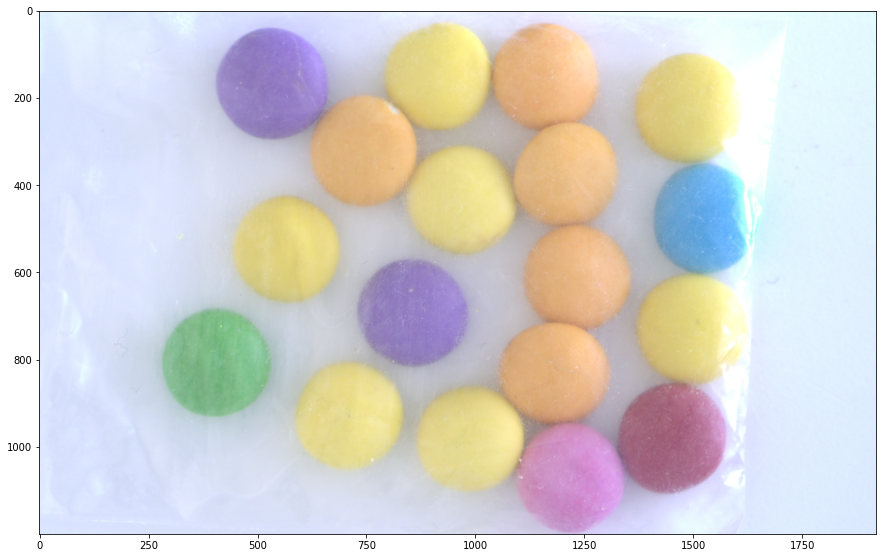

In [5]:
image_path = "" ### doplňte cestu k obrázku
image = ...(image_path) ### načtěte obrázek ze zvolené cesty
...(image) ### vizualizujte načtený obrázek

### 2) Segmentace objektů cílové barvy
Použijte vytvořenou funkci na načtený obrázek a zobrazte výsledek. Načtený obrázek nejdříve převedeme do prostoru HSV a následně si pro segmentaci vybereme pouze jeden kanál a to hue (odstín barvy). Před tím ještě využijeme funkci pro odstranění šumu. Výsledkem by měla být binární maska objektů. které chceme počítat.

Seznam proměných vystupující v algoritmu:
- `velikost_filtru ` - velikost jádra mediánové filtru, který je použit pro odstraňování šumu 
- `spodni_hranice_uhlu ` - spodní hranice kanálu hue 
- `horni_hranice_uhl`- horní hranice kanálu hue

Hodnoty kanálu hue, které je nutné použít pro segmentaci barvy je možné nalézt na obrázku níže.

<center><img src="https://cwsimons.com/wp-content/uploads/2017/10/color_wheel_hsl-1.png" alt="the name" width="250"/></center>

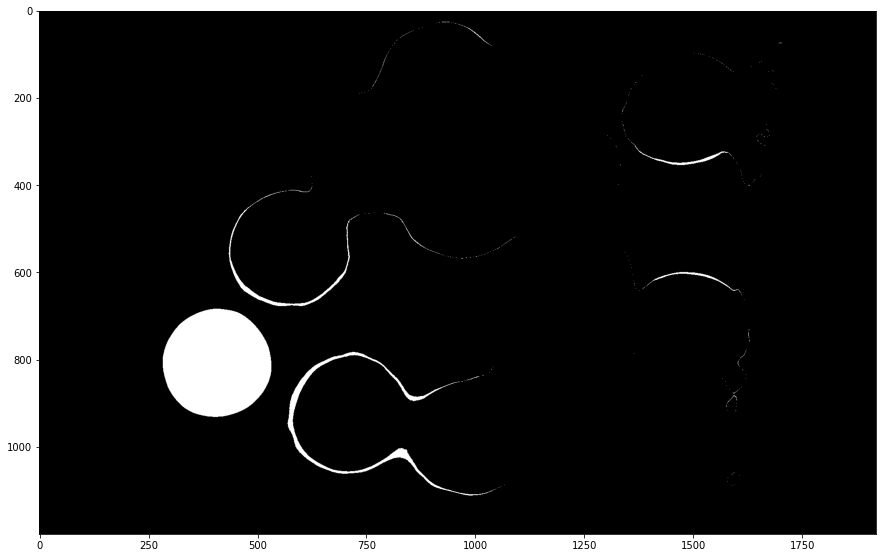

In [6]:
#@title Parametry segmentace { run: "auto" }

velikost_filtru = 1 #@param {type:"slider", min:1, max:51, step:2}
spodni_hranice_uhlu = 0 #@param {type:"slider", min:0, max:360, step:1}
horni_hranice_uhlu = 360 #@param {type:"slider", min:0, max:360, step:1}

def algorithm(img):
    # Předzpracování obrazu
    # ... převod do HSV
    image = ...(img)
    image = image[:,:,0]
    
    # ... filtrace, odstranění šumu
    image = ...(image, velikost_filtru)
    
    # Zde je potřeba vytvořit binární obrázek
    # ... vhodné funkce jsou z části segmentace
    img = ...(image, to_intensity(spodni_hranice_uhlu), to_intensity(horni_hranice_uhlu))
    return img

binary_image = algorithm(image)
...(binary_image) ### zobrazte výsledný obrázek

#### 3) Rozpojení objektů pomocí morfologických operací
Binární maska v sobě nyní může obsahovat ještě obrysy jiných objektů a případně další chyby, které jsme nebyli schopni potlačit segmentací podle barvy. Pro částečné odstranění těchto neduhů využijeme morfologické operace. Výsledkem by měla být vylepšená binární maska obsahující separované objekty. 

Seznam proměných vystupující v algoritmu:
- `velikost_filtru ` - velikost jádra morfologické operace

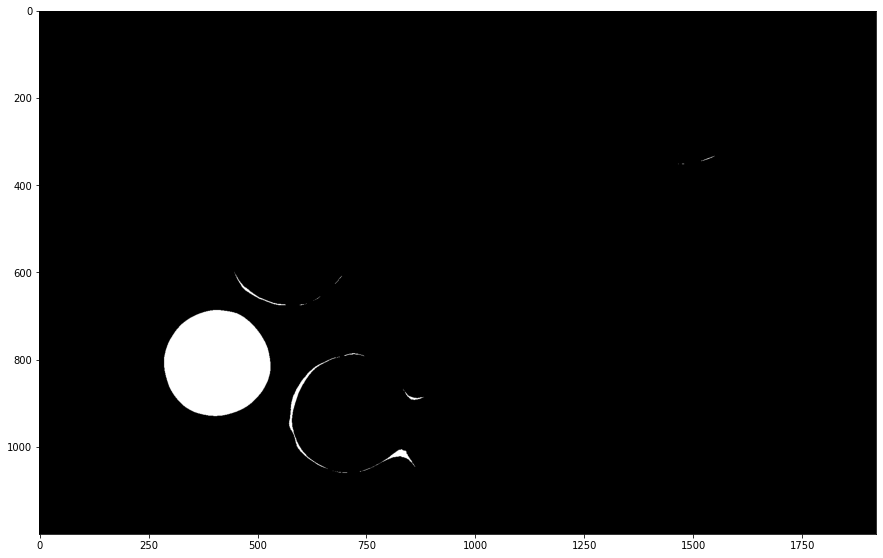

In [7]:
#@title Parametry segmentace { run: "auto" }

velikost_filtru = 3 #@param {type:"slider", min:1, max:51, step:2}

binary_image_morph = binary_image

binary_image_morph = ...(binary_image_morph, velikost_filtru) ### použijte funkci pro morfologickou operaci
...(binary_image_morph) ### zobrazte výsledný obrázek

#### 4) Počítání binárních objektů
Nyní bychom ve snímku měli mít v binární masce pouze chtěné objekty. Díky tomu, že se jedná o binární masku, tak můžeme aplikovat algoritmus detekce kontur. Následně se vypíše jejich počet

##### Bonus 1
Pokud vám ve snímku zbyly ještě nějaké malé objekty, které vám v tom dělají nepořádek. Tak funkce pro detekce kontur má ještě další parametry, které dovolují filtrování podle plochy kontury.
##### Bonus 2
Pokud vám ve snímku zbyly další nerelevatní objekty podivného tvaru, můžete se zamyslet nad tím, jak využít znalost toho, že chceme detekovat pouze kulaté objekty. Nápověda: funkce `roundness` 



In [8]:
_, count, contours = ...(binary_image_morph) ### spočtěte počet binárních objektů
print('Počet objektů je: ' +  str(count))

Počet objektů je: 9


#### 5) Vizualizace výsledné segmentované masky cílových objektů
Nyní máme k dispozici originální snímek a upravenou binární masku, kterou můžeme využít pro vizualizaci spočítaných objektů. 


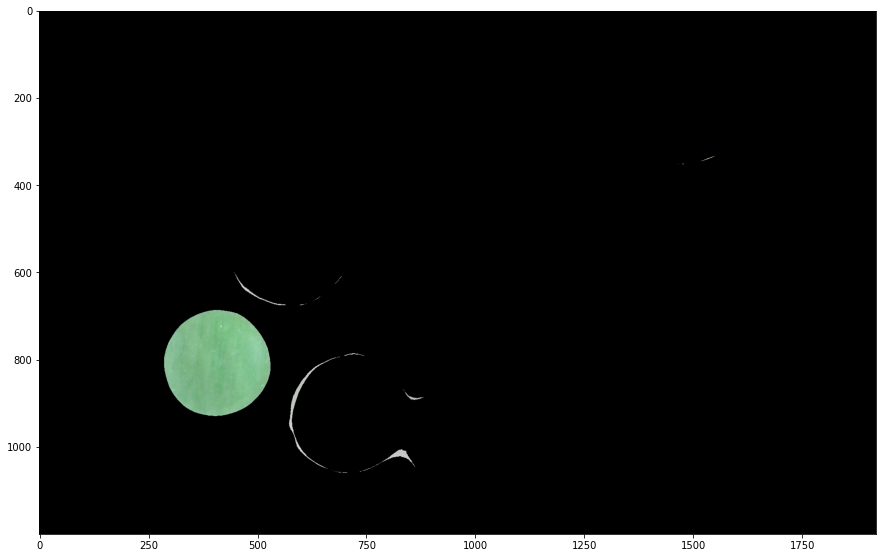

In [9]:
result = ...(image, binary_image_morph) ### funkce na "vymaskování" obrázku binární maskou
...(result) ### zobrazte obrázek